In [119]:
import pandas as pd
import os 
import duckdb
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from researchpy import ttest as rpTtest
import researchpy as rp
path = os.getcwd() #current path 

In [120]:
# reading into the TTCTscore data
# there are 7 scores columns for each stage(the begining and the ending)
TTCTscore = pd.read_excel(path + "/../data/dataset1_TTCTscore.xlsx")
# reading into the creativity assessment at the begining
BeginCrAssessment = pd.read_excel(path + "/../data/dataset2_beginingCreativityAssessment.xlsx")
# reading the creativity assessment at the begining
EndCrAssessment = pd.read_excel(path + "/../data/dataset3_endingassessment.xlsx")
# reading the highschool gpa data
HSGpa = pd.read_excel(path + "/../data/dataset4_highschoolGPA.xlsx")

In [121]:
# get the student rows are in the study
HSG_inStudy = HSGpa[HSGpa['ID'] != 'XX']
HSG_inStudy.shape

(486, 4)

In [122]:
# using sql to combine gpa data and BeginCrAssessment into one dataset by Student ID
BeginCrAssessmentandHSGpa = duckdb.query("select * from BeginCrAssessment as b inner join HSGpa as h on b.ID == h.ID").to_df()
BeginCrAssessmentandHSGpa.shape

(277, 39)

In [123]:
# have a look the missing gpa in this dataset
BeginCrAssessmentandHSGpa.isna().sum()[-2:]
# TTCTscore[TTCTscore['AugFluencySA'].isna() & TTCTscore['DECFluencySA'].isna()]

unweighted_hs_gpa    7
weighted_hs_gpa      7
dtype: int64

In [124]:
# using sql to combine gpa data and BeginCrAssessment into one dataset by Student ID
EndCrAssessmentandHSGpa = duckdb.query("select * from EndCrAssessment as b inner join HSGpa as h on b.ID == h.ID").to_df()
EndCrAssessmentandHSGpa.shape

(264, 43)

In [125]:
# let see how many missing gpa for the CrAssessment data 
EndCrAssessmentandHSGpa.isna().sum()[-2:]

unweighted_hs_gpa    3
weighted_hs_gpa      3
dtype: int64

In [126]:
# t-test for two sample
# Get two TTCTscore data for begin and end
# with dropping the nan
OnlyScore = TTCTscore.loc[:,'AugFluencySA':'DecRSOriginality'].dropna()
OnlyScore.head()


,AugFluencySA,AugFlexibilitySA,AugOriginalitySA,AugAverageSA,AUGRSFluency,AugRSFlexibility,AugRSOriginality,DECFluencySA,DecFlexibilitySA,DecOriginalitySA,DecAverageSA,DECRSFluency,DecRSFlexibility,DecRSOriginality
0,100.0,103.0,92.0,98.0,77,44,49,100.0,122.0,101.0,108.0,89,61,73
1,77.0,77.0,78.0,77.0,55,34,41,92.0,95.0,92.0,93.0,70,41,55
2,111.0,98.0,106.0,150.0,94,42,65,108.0,111.0,106.0,108.0,110,54,85
3,92.0,92.0,88.0,91.0,67,39,45,101.0,102.0,93.0,99.0,91,46,57
4,84.0,87.0,92.0,88.0,58,36,48,91.0,93.0,90.0,91.0,69,40,51


qqplot for the begin and end
AugFluencySA


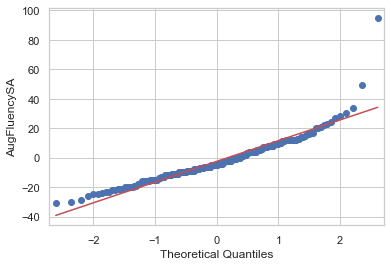

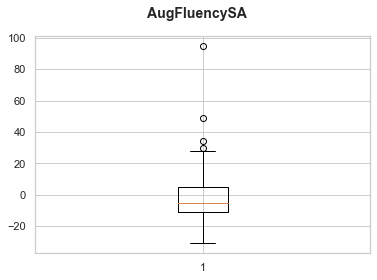

AugFlexibilitySA


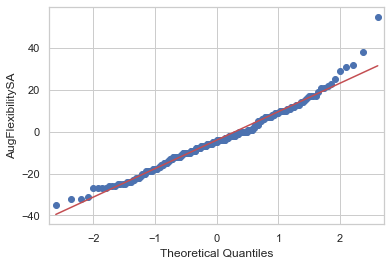

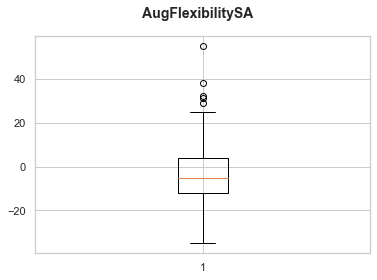

AugOriginalitySA


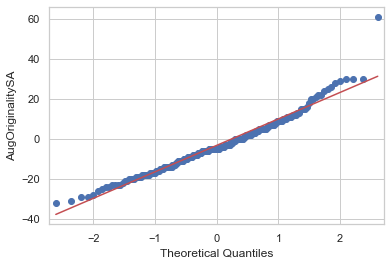

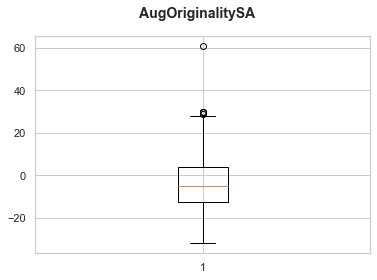

AugAverageSA


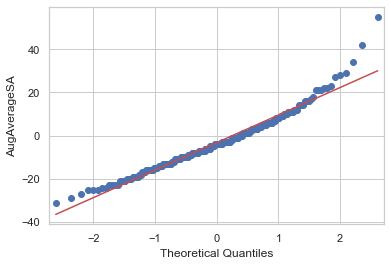

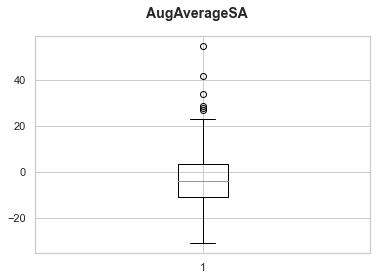

AUGRSFluency


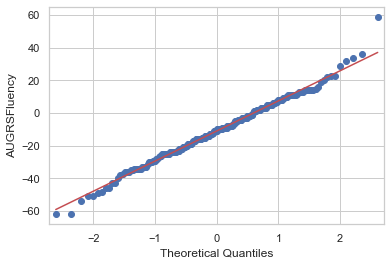

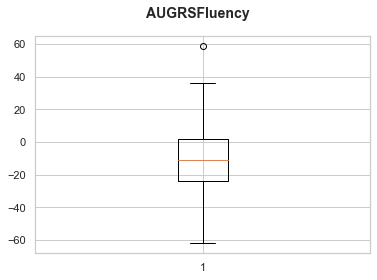

AugRSFlexibility


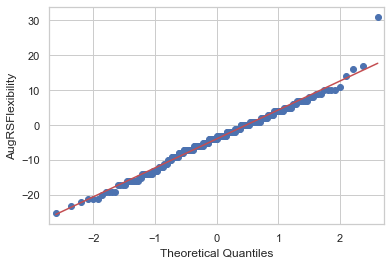

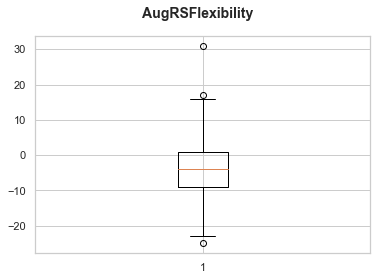

AugRSOriginality


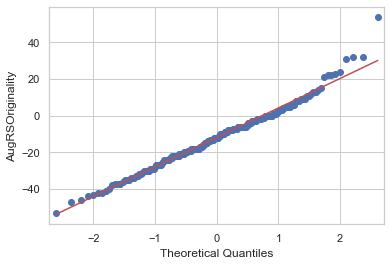

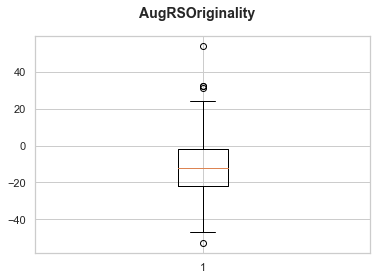

In [127]:
# qqplot
print('qqplot for the begin and end')
# for each column we plot the qqplot
for i in range(0, 7):
    print(OnlyScore.columns[i])
    sm.qqplot(OnlyScore.iloc[:,i] - OnlyScore.iloc[:,i+7], line = 's', ylabel = OnlyScore.columns[i])
    # boxplot
    fig = plt.figure()
    fig.suptitle(OnlyScore.columns[i], fontsize=14, fontweight='bold')
    plt.boxplot(OnlyScore.iloc[:,i] - OnlyScore.iloc[:,i+7])
    plt.show()

In [128]:
# let us to see what is the value of these 'outliers'
outlier_begin = OnlyScore.iloc[:,0].sort_values().iloc[[0,1,-2,-1],]
outlier_end = OnlyScore.iloc[:,7].sort_values().iloc[[0,1,-2,-1],]
# these 'outliers' are not too much high or low, we choose to keep them
print(outlier_begin, outlier_end)
OnlyScore.loc[:,['AugAverageSA', 'DecAverageSA']].mean()

45      62.0
165     62.0
56     138.0
185    200.0
Name: AugFluencySA, dtype: float64 46      49.0
94      59.0
11     120.0
131    123.0
Name: DECFluencySA, dtype: float64


AugAverageSA    89.803653
DecAverageSA    93.013699
dtype: float64

In [129]:
rpRes = []
for i in range(0, 7):
# paired t-test
    # print('This paired t-test is for ', OnlyScore.columns[i], ' and ', OnlyScore.columns[i+7], ':') 
    # r, p = stats.ttest_rel(OnlyScore.iloc[:, i], OnlyScore.iloc[:, i+7])
    # print(r, p)
    rpRes.append(rpTtest(OnlyScore.iloc[:, i], OnlyScore.iloc[:, i+7], equal_variances = True, paired = True))
# References: McDonald, J.H(2014). Handbook of Biology Statistics(3 rd). Baltimore:Sparky House Publishing


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:140: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:140: FutureWarning: The series.append method is deprecated and wil

In [130]:
rpRes[0]

(       Variable      N       Mean         SD        SE  95% Conf.   Interval
 0  AugFluencySA  219.0  90.826484  16.192563  1.094192  88.669935  92.983033
 1  DECFluencySA  219.0  93.328767  10.765288  0.727451  91.895030  94.762504
 2          diff  219.0  -2.502283  14.101003  0.952858  -4.380275  -0.624291,
                          Paired samples t-test   results
 0  Difference (AugFluencySA - DECFluencySA) =    -2.5023
 1                        Degrees of freedom =   218.0000
 2                                         t =    -2.6261
 3                     Two side test p value =     0.0092
 4                    Difference < 0 p value =     0.0046
 5                    Difference > 0 p value =     0.9954
 6                                 Cohen's d =    -0.1856
 7                                 Hedge's g =    -0.1853
 8                            Glass's delta1 =    -0.1545
 9                          Point-Biserial r =    -0.1751)

In [131]:
rpRes[1]

(           Variable      N       Mean         SD        SE  95% Conf.  \
 0  AugFlexibilitySA  219.0  89.698630  14.133718  0.955068  87.816281   
 1  DecFlexibilitySA  219.0  93.703196  12.882622  0.870527  91.987470   
 2              diff  219.0  -4.004566  13.660194  0.923070  -5.823851   
 
     Interval  
 0  91.580979  
 1  95.418923  
 2  -2.185282  ,
                                Paired samples t-test   results
 0  Difference (AugFlexibilitySA - DecFlexibilityS...   -4.0046
 1                              Degrees of freedom =   218.0000
 2                                               t =    -4.3383
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     0.0000
 5                          Difference > 0 p value =     1.0000
 6                                       Cohen's d =    -0.2965
 7                                       Hedge's g =    -0.2959
 8                                  Glass's delta1 =    -0.28

In [132]:
rpRes[2]

(           Variable      N       Mean         SD        SE  95% Conf.  \
 0  AugOriginalitySA  219.0  88.652968  14.983420  1.012486  86.657454   
 1  DecOriginalitySA  219.0  92.013699  10.803703  0.730047  90.574846   
 2              diff  219.0  -3.360731  13.283518  0.897617  -5.129849   
 
     Interval  
 0  90.648482  
 1  93.452552  
 2  -1.591612  ,
                                Paired samples t-test   results
 0  Difference (AugOriginalitySA - DecOriginalityS...   -3.3607
 1                              Degrees of freedom =   218.0000
 2                                               t =    -3.7441
 3                           Two side test p value =     0.0002
 4                          Difference < 0 p value =     0.0001
 5                          Difference > 0 p value =     0.9999
 6                                       Cohen's d =    -0.2607
 7                                       Hedge's g =    -0.2602
 8                                  Glass's delta1 =    -0.22

In [133]:
rpRes[3]

(       Variable      N       Mean         SD        SE  95% Conf.   Interval
 0  AugAverageSA  219.0  89.803653  14.517082  0.980974  87.870247  91.737059
 1  DecAverageSA  219.0  93.013699  10.981836  0.742084  91.551122  94.476276
 2          diff  219.0  -3.210046  12.766847  0.862704  -4.910353  -1.509738,
                          Paired samples t-test   results
 0  Difference (AugAverageSA - DecAverageSA) =    -3.2100
 1                        Degrees of freedom =   218.0000
 2                                         t =    -3.7209
 3                     Two side test p value =     0.0003
 4                    Difference < 0 p value =     0.0001
 5                    Difference > 0 p value =     0.9999
 6                                 Cohen's d =    -0.2518
 7                                 Hedge's g =    -0.2513
 8                            Glass's delta1 =    -0.2211
 9                          Point-Biserial r =    -0.2444)

In [134]:
rpRes[4]

(       Variable      N       Mean         SD        SE  95% Conf.   Interval
 0  AUGRSFluency  219.0  66.831050  19.223546  1.299007  64.270830  69.391270
 1  DECRSFluency  219.0  77.757991  21.762919  1.470602  74.859574  80.656408
 2          diff  219.0 -10.926941  18.474981  1.248424 -13.387466  -8.466416,
                          Paired samples t-test   results
 0  Difference (AUGRSFluency - DECRSFluency) =   -10.9269
 1                        Degrees of freedom =   218.0000
 2                                         t =    -8.7526
 3                     Two side test p value =     0.0000
 4                    Difference < 0 p value =     0.0000
 5                    Difference > 0 p value =     1.0000
 6                                 Cohen's d =    -0.5332
 7                                 Hedge's g =    -0.5323
 8                            Glass's delta1 =    -0.5684
 9                          Point-Biserial r =    -0.5099)

In [135]:
rpRes[5]

(           Variable      N       Mean        SD        SE  95% Conf.  \
 0  AugRSFlexibility  219.0  37.374429  7.860392  0.531156  36.327571   
 1  DecRSFlexibility  219.0  41.283105  9.029627  0.610166  40.080526   
 2              diff  219.0  -3.908676  8.301700  0.560977  -5.014308   
 
     Interval  
 0  38.421288  
 1  42.485684  
 2  -2.803043  ,
                                Paired samples t-test   results
 0  Difference (AugRSFlexibility - DecRSFlexibilit...   -3.9087
 1                              Degrees of freedom =   218.0000
 2                                               t =    -6.9676
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     0.0000
 5                          Difference > 0 p value =     1.0000
 6                                       Cohen's d =    -0.4628
 7                                       Hedge's g =    -0.4620
 8                                  Glass's delta1 =    -0.4973
 

In [136]:
rpRes[6]

(           Variable      N       Mean         SD        SE  95% Conf.  \
 0  AugRSOriginality  219.0  46.803653  16.926251  1.143770  44.549390   
 1  DecRSOriginality  219.0  58.639269  18.517349  1.251286  56.173102   
 2              diff  219.0 -11.835616  16.131069  1.090037 -13.983976   
 
     Interval  
 0  49.057916  
 1  61.105437  
 2  -9.687257  ,
                                Paired samples t-test   results
 0  Difference (AugRSOriginality - DecRSOriginalit...  -11.8356
 1                              Degrees of freedom =   218.0000
 2                                               t =   -10.8580
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     0.0000
 5                          Difference > 0 p value =     1.0000
 6                                       Cohen's d =    -0.6679
 7                                       Hedge's g =    -0.6667
 8                                  Glass's delta1 =    -0.69

In [137]:
# At least from above analysis, we hace enough evidence to say that students' creative thinking 
# will improve after taking the class.
# Now it is time for us to explore if Gender will affect the score improvement 
# drop rows having missing data
TTCTscore_nonmissing = TTCTscore.dropna()
# make a difference
TTCTscore_nonmissing['avg_dif'] = TTCTscore_nonmissing['DecAverageSA'] - TTCTscore_nonmissing['AugAverageSA']
# Get the female group
TTCTscore_avgdif_female = TTCTscore_nonmissing[TTCTscore_nonmissing.Gender == 2]['avg_dif']
# Get the male group
TTCTscore_avgdif_male = TTCTscore_nonmissing[TTCTscore_nonmissing.Gender == 1]['avg_dif']
# 3 conditions for T-test
# 1. Both sample random
# 2. Both populations Normal
# 3. Samples independent of each other

/var/folders/xs/sxzr32hj51l6rhh0wprlc5nc0000gn/T/ipykernel_77682/1070043173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTCTscore_nonmissing['avg_dif'] = TTCTscore_nonmissing['DecAverageSA'] - TTCTscore_nonmissing['AugAverageSA']


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


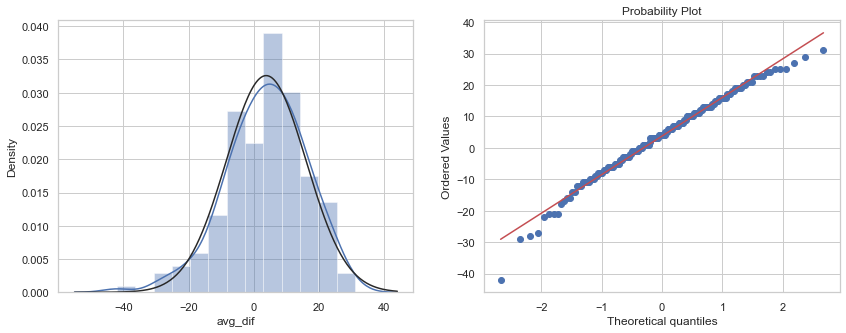

<Figure size 432x288 with 0 Axes>

In [138]:
#lets’s quickly look at the sample distribution by plotting histogram
from scipy.stats import norm
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
sns.distplot(TTCTscore_avgdif_female[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(TTCTscore_avgdif_female[:,], plot=plt)
fig = plt.figure()

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


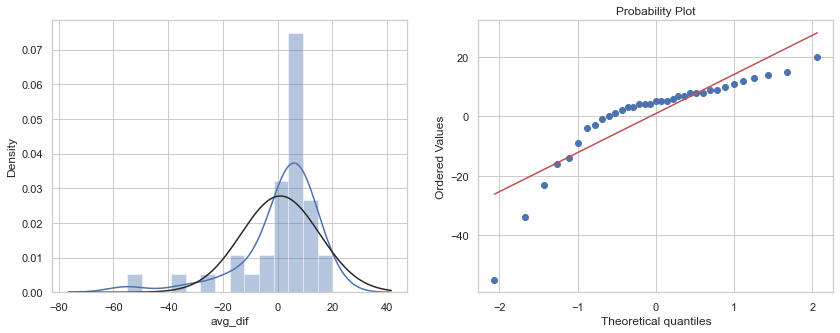

<Figure size 432x288 with 0 Axes>

In [139]:
# histogram for male
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
ax2 = fig.add_subplot(121) 
sns.distplot(TTCTscore_avgdif_male[:,],fit=norm)
ax2 = fig.add_subplot(122) 
res = stats.probplot(TTCTscore_avgdif_male[:,], plot=plt)
fig = plt.figure()
# the qqplot shows our data for male is not normal.
# But cause our observation numbers for female and male are both greater than 30
# with applying the CLT, we can say that the distribution of sample means 
# approximates a normal distribution as the sample size gets larger,
#  regardless of the population's distribution.

In [140]:
# t-test for means of two Independent group
# t-test for male improvement and female improvement
summary, results = rp.ttest(group1= TTCTscore_avgdif_male[:,], group1_name= "Male",
         group2= TTCTscore_avgdif_female[:,], group2_name= "Female")
print(summary)

   Variable      N      Mean         SD        SE  95% Conf.  Interval
0      Male   35.0  0.971429  14.577351  2.464022  -4.036067  5.978924
1    Female  183.0  3.775956  12.278323  0.907640   1.985107  5.566806
2  combined  218.0  3.325688  12.680744  0.858848   1.632935  5.018441


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [141]:
print(results)

              Independent t-test   results
0  Difference (Male - Female) =    -2.8045
1          Degrees of freedom =   216.0000
2                           t =    -1.2000
3       Two side test p value =     0.2314
4      Difference < 0 p value =     0.1157
5      Difference > 0 p value =     0.8843
6                   Cohen's d =    -0.2214
7                   Hedge's g =    -0.2206
8              Glass's delta1 =    -0.1924
9            Point-Biserial r =    -0.0814


In [171]:
# t-test for female and male begin TTCT score
# Get the female group
TTCTscore_avgdif_female = TTCTscore_nonmissing[TTCTscore_nonmissing.Gender == 2]['AugAverageSA']
# Get the male group
TTCTscore_avgdif_male = TTCTscore_nonmissing[TTCTscore_nonmissing.Gender == 1]['AugAverageSA']
# 3 conditions for T-test
# 1. Both sample random
# 2. Both populations Normal
# 3. Samples independent of each other
summary, results = rp.ttest(group1= TTCTscore_avgdif_male[:,], group1_name= "Male",
         group2= TTCTscore_avgdif_female[:,], group2_name= "Female")
print(summary)
print(results)

   Variable      N       Mean         SD        SE  95% Conf.   Interval
0      Male   34.0  88.970588  11.376438  1.951043  85.001161  92.940015
1    Female  173.0  89.838150  14.739101  1.120593  87.626265  92.050035
2  combined  207.0  89.695652  14.220494  0.988393  87.746990  91.644314
              Independent t-test   results
0  Difference (Male - Female) =    -0.8676
1          Degrees of freedom =   205.0000
2                           t =    -0.3245
3       Two side test p value =     0.7459
4      Difference < 0 p value =     0.3729
5      Difference > 0 p value =     0.6271
6                   Cohen's d =    -0.0609
7                   Hedge's g =    -0.0607
8              Glass's delta1 =    -0.0763
9            Point-Biserial r =    -0.0227


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [142]:
# combine HSgpa and TTCTscore into one dataset
# take out demographic information, TTCT avg score and gpa
TTCTscore_pro2 = TTCTscore.merge(HSGpa, on='Number', how = 'inner').loc[:,['Number', 'IntendedMajor', 'Hometown', 'Race', 'Gender', 'AugAverageSA', 'DecAverageSA', 'unweighted_hs_gpa', 'weighted_hs_gpa']]
# for hometown information:
# remove trailing blanks in 'town '
TTCTscore_pro2.loc[TTCTscore_pro2.Hometown == 'twon ', 'Hometown'] = 'town'
TTCTscore_pro2.loc[TTCTscore_pro2.Hometown == 'township', 'Hometown'] = 'town'
TTCTscore_pro2.loc[TTCTscore_pro2.Hometown == 'rural ', 'Hometown'] = 'rural'
TTCTscore_pro2.loc[TTCTscore_pro2.Hometown == 'rural area', 'Hometown'] = 'rural'
TTCTscore_pro2.loc[TTCTscore_pro2.Hometown == 'small city', 'Hometown'] = 'large city'
TTCTscore_pro2.loc[TTCTscore_pro2.Hometown == 'small town', 'Hometown'] = 'town'
TTCTscore_pro2.loc[TTCTscore_pro2.Race == 'multi.', 'Race'] = 'multi'
TTCTscore_pro2.loc[TTCTscore_pro2.Race == 'asain', 'Race'] = 'asian'

TTCTscore_nonmissing = TTCTscore_pro2.dropna()
TTCTscore_nonmissing['avg_dif'] = TTCTscore_nonmissing['DecAverageSA'] - TTCTscore_nonmissing['AugAverageSA']
TTCTscore_pro2.Hometown.unique()

/var/folders/xs/sxzr32hj51l6rhh0wprlc5nc0000gn/T/ipykernel_77682/963493890.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTCTscore_nonmissing['avg_dif'] = TTCTscore_nonmissing['DecAverageSA'] - TTCTscore_nonmissing['AugAverageSA']


array(['large city', 'rural', 'town', 'suburb', 'village'], dtype=object)

In [143]:
# Second, let's consider about the weighted_hs_gpa
# bin the weighted_hs_gpa as three group
# the three group ranges are (0 , 4.3], (4.3, 4.5], (4.6, 5]
# Why we set up tree ranges like this?
# We want to distinguish gpa by defining 3 type: lower, middium and higher
# And there are 65, 84, 57 obeservations for each group
TTCTscore_nonmissing_lowergpa = TTCTscore_nonmissing[TTCTscore_nonmissing['weighted_hs_gpa'] <= 4.3]
TTCTscore_nonmissing_middiumgpa = TTCTscore_nonmissing[(4.3<TTCTscore_nonmissing['weighted_hs_gpa']) & (TTCTscore_nonmissing['weighted_hs_gpa'] <= 4.5)]
TTCTscore_nonmissing_highergpa = TTCTscore_nonmissing[(4.5 < TTCTscore_nonmissing['weighted_hs_gpa']) & (TTCTscore_nonmissing['weighted_hs_gpa'] <= 5)]
TTCTscore_nonmissing_lowergpa.shape

(65, 10)

In [144]:
# for three groups 
# we will use ANOVA F-test
# Check conditions:
# 1. all samples are random
# 2. Samples are independent
# 3. All populations are normal
# 4. All populations variance are equal


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


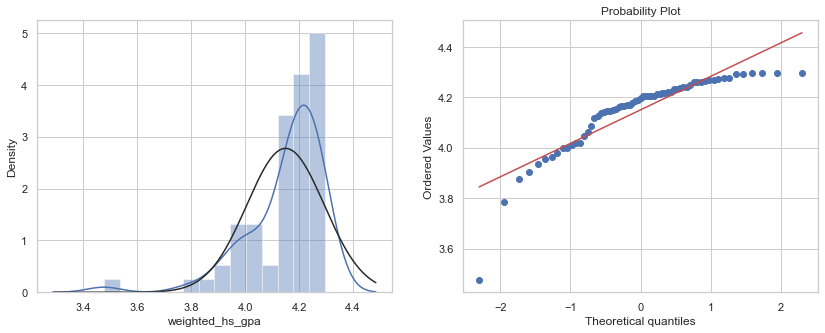

<Figure size 432x288 with 0 Axes>

In [145]:
# histogram for lower gpa
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
ax2 = fig.add_subplot(121) 
sns.distplot(TTCTscore_nonmissing_lowergpa['weighted_hs_gpa'],fit=norm)
ax2 = fig.add_subplot(122) 
res = stats.probplot(TTCTscore_nonmissing_lowergpa['weighted_hs_gpa'], plot=plt)
fig = plt.figure()
# the qqplot shows our data for male is not normal.
# But cause our observation numbers for female and male are both greater than 30
# with applying the CLT, we can say that the distribution of sample means 
# approximates a normal distribution as the sample size gets larger,
#  regardless of the population's distribution.

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


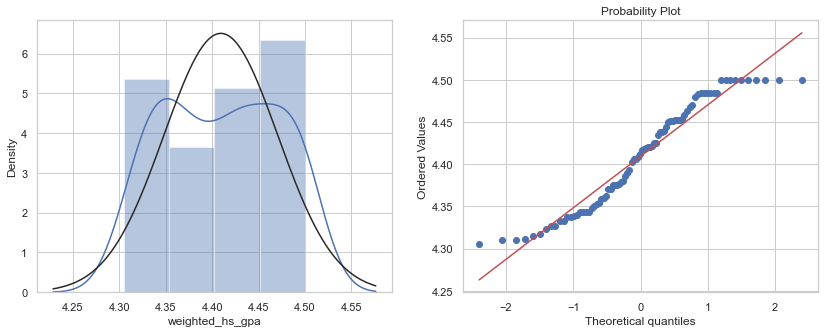

<Figure size 432x288 with 0 Axes>

In [146]:
# histogram for middium gpa
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
ax2 = fig.add_subplot(121) 
sns.distplot(TTCTscore_nonmissing_middiumgpa['weighted_hs_gpa'],fit=norm)
ax2 = fig.add_subplot(122) 
res = stats.probplot(TTCTscore_nonmissing_middiumgpa['weighted_hs_gpa'], plot=plt)
fig = plt.figure()
# the qqplot shows our data for male is not normal.
# But cause our observation numbers for female and male are both greater than 30
# with applying the CLT, we can say that the distribution of sample means 
# approximates a normal distribution as the sample size gets larger,
#  regardless of the population's distribution.

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


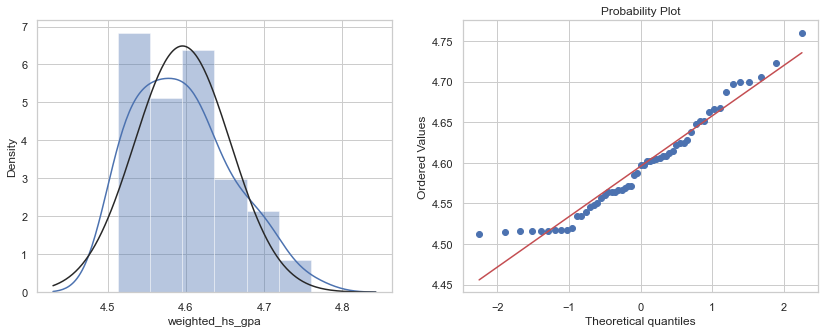

<Figure size 432x288 with 0 Axes>

In [147]:
# histogram for middium gpa
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
ax2 = fig.add_subplot(121) 
sns.distplot(TTCTscore_nonmissing_highergpa['weighted_hs_gpa'],fit=norm)
ax2 = fig.add_subplot(122) 
res = stats.probplot(TTCTscore_nonmissing_highergpa['weighted_hs_gpa'], plot=plt)
fig = plt.figure()
# the qqplot shows our data for male is not normal.
# But cause our observation numbers for female and male are both greater than 30
# with applying the CLT, we can say that the distribution of sample means 
# approximates a normal distribution as the sample size gets larger,
#  regardless of the population's distribution.

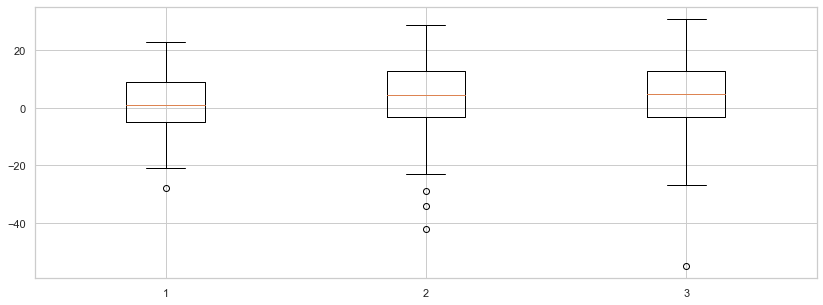

<Figure size 432x288 with 0 Axes>

In [148]:
# easily detect the differences between different groups
# improvement
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
plt.boxplot([TTCTscore_nonmissing_lowergpa['avg_dif'], TTCTscore_nonmissing_middiumgpa['avg_dif'],TTCTscore_nonmissing_highergpa['avg_dif']])
fig = plt.figure()

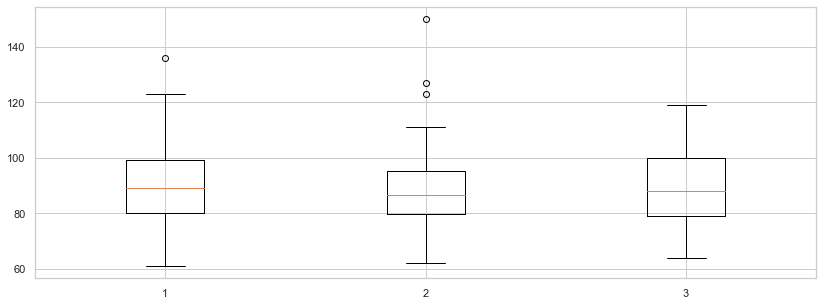

<Figure size 432x288 with 0 Axes>

In [149]:
# easily detect the differences between different groups
# Begining TTCT score
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
plt.boxplot([TTCTscore_nonmissing_lowergpa['AugAverageSA'], TTCTscore_nonmissing_middiumgpa['AugAverageSA'],TTCTscore_nonmissing_highergpa['AugAverageSA']])
fig = plt.figure()

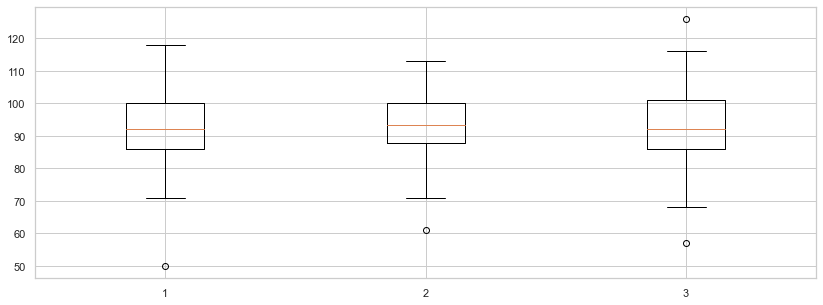

<Figure size 432x288 with 0 Axes>

In [150]:
# Easily detect the differences between different groups
# Ending TTCT score
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
plt.boxplot([TTCTscore_nonmissing_lowergpa['DecAverageSA'], TTCTscore_nonmissing_middiumgpa['DecAverageSA'],TTCTscore_nonmissing_highergpa['DecAverageSA']])
fig = plt.figure()

In [151]:
# Combine two series.
from scipy.stats import f_oneway
# Conduct the one-way ANOVA
f_oneway(TTCTscore_nonmissing_lowergpa['DecAverageSA'], TTCTscore_nonmissing_middiumgpa['DecAverageSA'], TTCTscore_nonmissing_highergpa['DecAverageSA'])

F_onewayResult(statistic=0.28669259689216425, pvalue=0.751045932107622)

In [152]:
BeginCrAssessment.columns.values

array(['Timestamp', 'FirstName', 'LastName', 'ID', 'Instructor',
       'IntendedMajor', 'ZipCode', 'HometownDescription', 'Gender',
       'Race', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9',
       'S10', 'S11', 'S12', 'S13', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
       'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12'], dtype=object)

In [153]:
#Howetown Description unique values
BeginCrAssessment.HometownDescription.unique()

array(['Small city', 'Suburb', 'Town', 'Large city', 'Rural Area',
       'Village', 'Township'], dtype=object)

In [154]:
# There are 196 different zipCode 
BeginCrAssessment.ZipCode.unique()

array([28412, 27616, 27403, 60126, 27713, 27587, 27410, 28409, 77096,
       27519, 28315, '01516', 28115, 60439, 29466, 45238, 29625, 28020,
       28146, 28129, 27406, 28152, 91773, 28470, 28277, 27880, 28326,
       28037, 28012, 27208, 27893, 28078, 28278, 28173, 27540, 45069,
       27043, 28806, 30068, 28327, 27215, 27517, 27513, 13219, 20613,
       18901, 27106, 28451, 27529, 27524, 28054, 28036, 28328, 27518,
       28376, 28504, 28574, 28501, 27502, 60015, 28214, 28312, 27521,
       20607, 27888, 28105, 27592, 27874, 27983, 28726, 27320, 28337,
       28086, 60564, 27910, 27023, 27103, 91105, 22602, 28374, 27591,
       28601, 28658, 23235, 45106, 28379, 23669, 27834, 27851, 27608,
       22182, 27522, 13077, 23838, 27298, 27101, 14510, 27249, 27284,
       27613, 28075, 27356, 11743, 28262, 28079, 21102, 27263, 27407,
       23059, 28719, 27609, 27953, 28527, 27511, 27520, 28083, 27370,
       27253, 27040, 28348, 77406, 28306, 27539, 28663, 27549, 27606,
       27909, 2727

In [155]:
# intendedMajor
BeginCrAssessment.IntendedMajor.unique()

array(['Nutrition', 'Genetics', 'Biochemistry', 'Biology - BA', 'Zoology',
       'Biology - BS', 'A major outside of science', 'Plant Biology',
       'Microbiology'], dtype=object)

In [156]:
BeginCrAssessment.Race.unique()

array(['Caucasian; White', 'Indian', 'African-American; Black; African',
       'Multiracial', 'Asian', 'Hispanic; Latinx',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [157]:
# reference: https://www.kaggle.com/code/adachowicz/house-prices-random-forest-regression-analysis
# Random forest 
# Pre-processing Categorical Features
# define a function to convert an object (categorical) feature into an int feature
# 0 = most common category, highest int = least common.
# Gender = 2 means Female.
def getObjectFeature(df, col, datalength=500):
    if df[col].dtype!='object': # if it's not categorical..
        print('feature',col,'is not an object feature.')
        return df
    elif len([i for i in df[col].T.notnull() if i == True])!=datalength: # if there's missing data..
        print('feature',col,'is missing data.')
        return df
    else:
        df1 = df
        counts = df1[col].value_counts() # get the counts for each label for the feature
        df1[col] = [counts.index.tolist().index(i) for i in df1[col]] # do the conversion
        print(counts.index.tolist())
        return df1 # make the new (integer) column from the conversion

# and test the function...
# fcntest = getObjectFeature(TTCTscore_pro2, 'Gender', len(TTCTscore_pro2.Gender))
TTCTscore_pro2 = getObjectFeature(TTCTscore_pro2, 'Race', len(TTCTscore_pro2.Race))
TTCTscore_pro2 = getObjectFeature(TTCTscore_pro2, 'Hometown', len(TTCTscore_pro2.Hometown))
TTCTscore_pro2 = getObjectFeature(TTCTscore_pro2, 'IntendedMajor', len(TTCTscore_pro2.IntendedMajor))

TTCTscore_pro2.head(10)

['white', 'black', 'hispanic', 'multi', 'asian', 'indian', 'Native Hawaiian']
['town', 'suburb', 'large city', 'rural', 'village']
['biology', 'biochemistry', 'zoology', 'BA biology', 'genetics', 'nutrition', 'microbiology', 'other', 'plant biology', 'town white', 'biology ']


,Number,IntendedMajor,Hometown,Race,Gender,AugAverageSA,DecAverageSA,unweighted_hs_gpa,weighted_hs_gpa
0,1,2,2,4,1,98.0,108.0,3.637,4.086
1,2,0,2,4,2,77.0,93.0,3.882,4.500
2,3,0,2,4,2,150.0,108.0,3.836,4.344
3,4,0,3,0,2,91.0,99.0,4.000,4.540
4,5,1,2,1,1,88.0,91.0,3.774,4.359
5,7,0,0,2,2,111.0,107.0,3.700,4.375
6,8,5,1,5,2,94.0,89.0,3.656,4.234
7,9,0,2,3,2,NaN,97.0,3.818,4.590
8,10,0,1,5,2,101.0,104.0,3.875,4.438
9,11,2,0,0,1,93.0,79.0,3.726,4.012


In [158]:
# # visulization of zip code
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# zip_codes = pd.read_csv(path + "/../data/county-fips.csv", index_col=False)
# zip_codes_clean = zip_codes.groupby(by=['ZIP','STATE'], as_index=False).first()[['ZIP','STATE']]
# BeginCrAssessment = pd.merge(BeginCrAssessment, zip_codes_clean, left_on='ZipCode', right_on='ZIP', how='left')
# states = BeginCrAssessment['ZipCode'].value_counts().index
# salescount = BeginCrAssessment['ZipCode'].value_counts().values

# data = [ dict(
#         type='choropleth',
#         locations = states,
#         z = salescount, 
#         locationmode = 'USA-states',
#         colorbar = dict(
#             title = "Salescount")
#         ) ]

# layout = dict(
#     title = 'US used car sales by states',
#     geo = dict(
#         scope = 'usa',
#         projection=dict(type='albers usa')
#     )
# )

# fig = dict(data=data, layout=layout)
# iplot(fig, filename='d3-cloropleth-map')

In [159]:
#calculate the begin and end TTCtscore difference, which is the response variable
TTCTscore_pro2['avg_dif'] = TTCTscore_pro2['DecAverageSA'] - TTCTscore_pro2['AugAverageSA']
# drop missing values
TTCTscore_pro2_clean = TTCTscore_pro2.iloc[: , 1:].dropna()

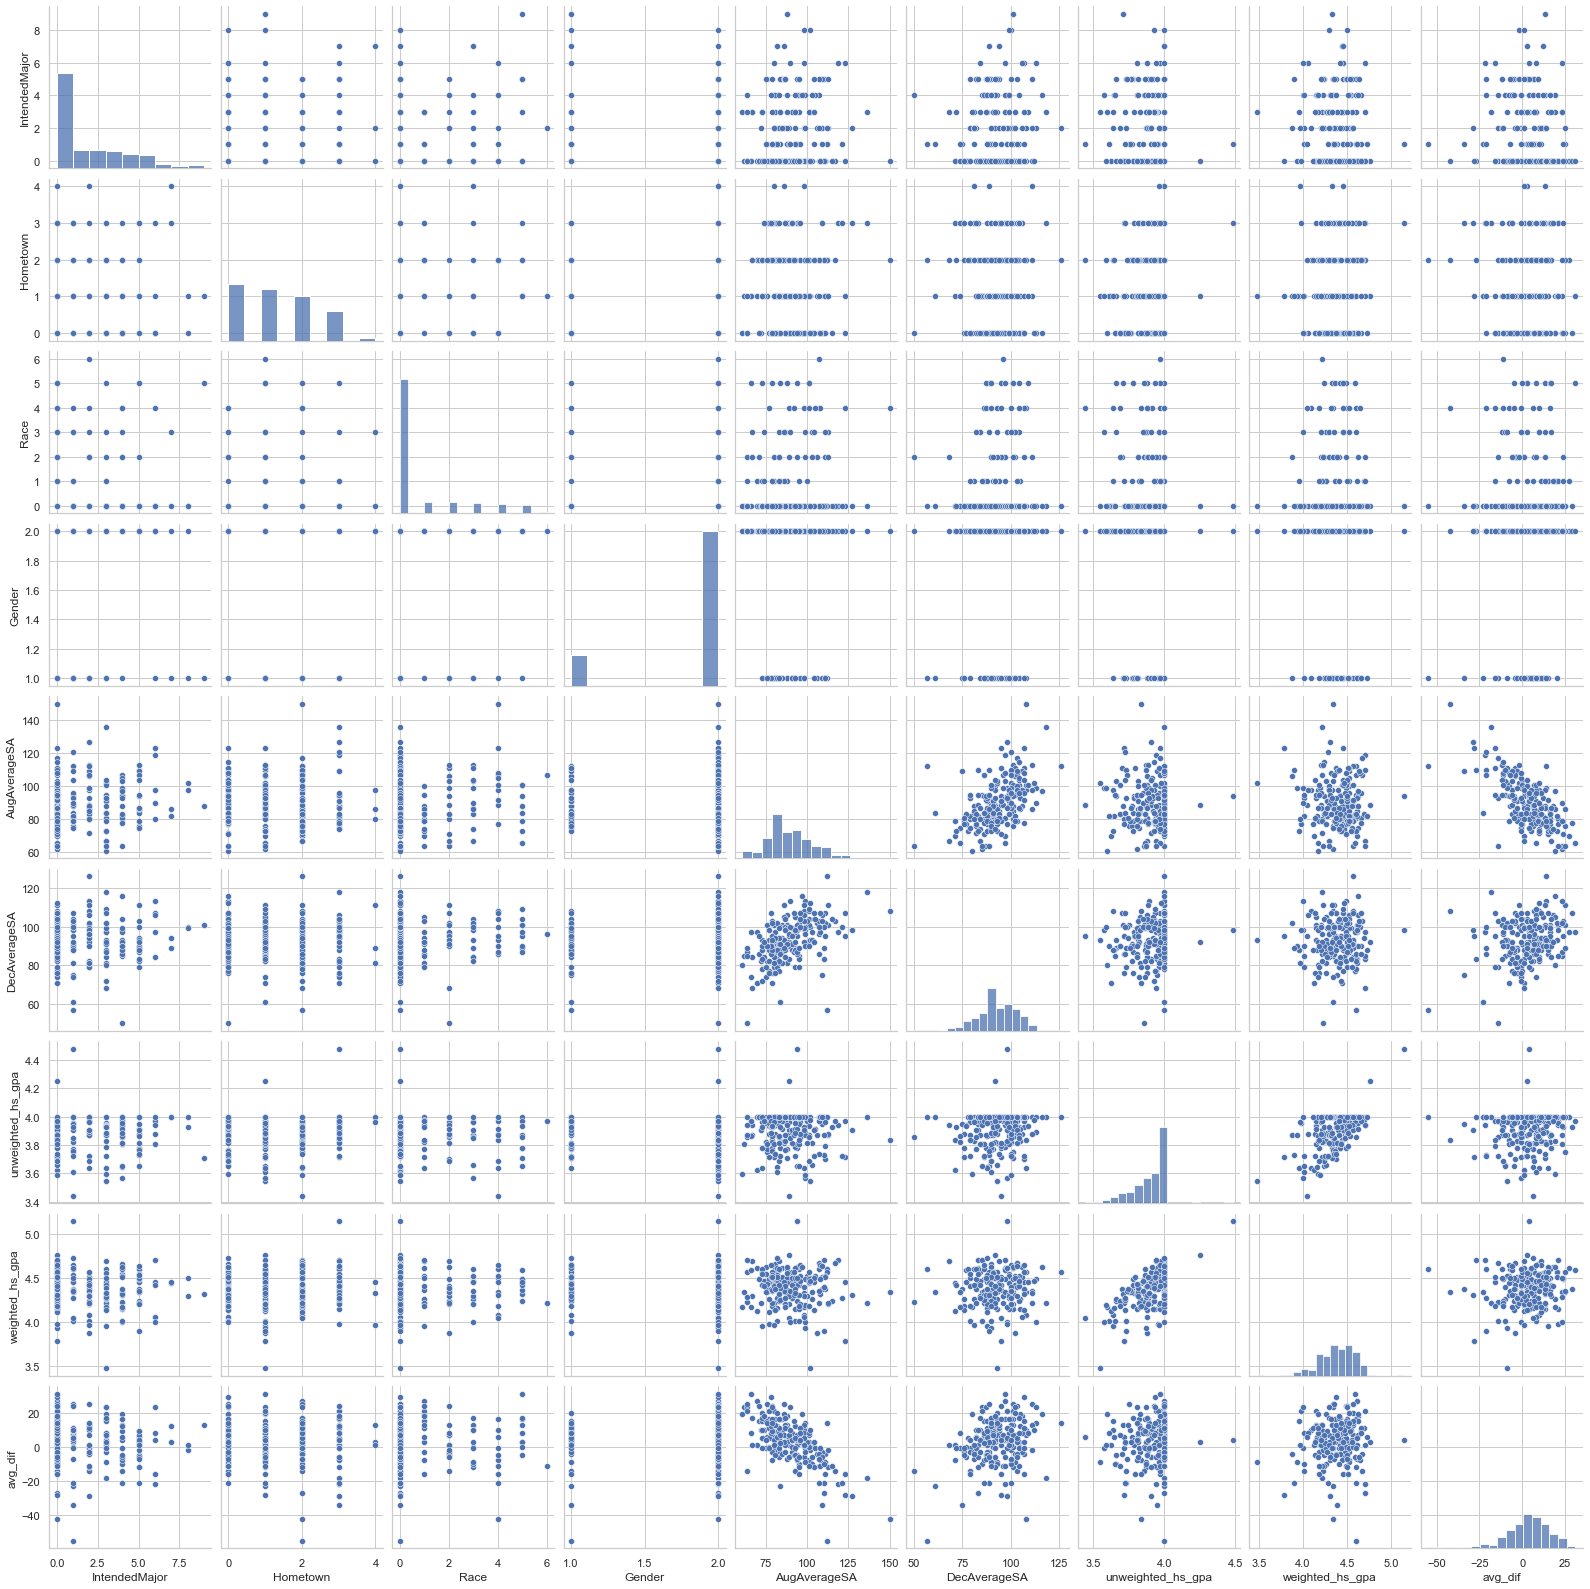

In [160]:
#Let's start with a pairplot to get an overview of the data.
sns.set(style="whitegrid")
sns.pairplot(TTCTscore_pro2_clean)
plt.show()

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


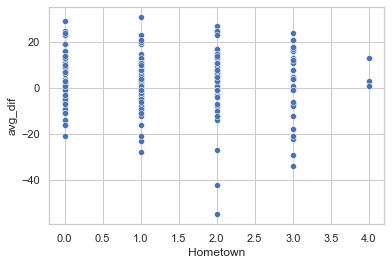

In [161]:
# Let's take a look how the Hometown/avg_dif scatter plot looks like
g = sns.scatterplot(TTCTscore_pro2_clean.Hometown, TTCTscore_pro2_clean.avg_dif)
g.set(xlabel='Hometown', ylabel='avg_dif')
plt.show()

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


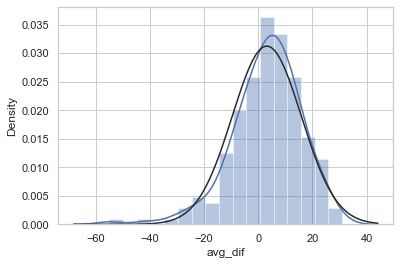

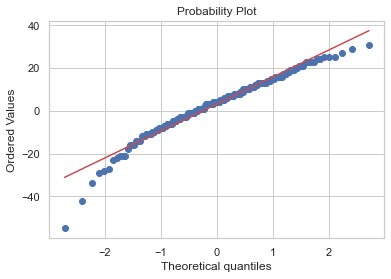

In [162]:
# Normality ?
#histogram and normal probability plot
from scipy.stats import norm
sns.distplot(TTCTscore_pro2_clean['avg_dif'],fit=norm)
fig = plt.figure()
res = stats.probplot(TTCTscore_pro2_clean['avg_dif'], plot=plt)
# normal

In [163]:
# Random forest
from sklearn.tree import DecisionTreeRegressor as dtr
# define the training data X...
X = TTCTscore_pro2_clean[['IntendedMajor', 'Hometown', 'Race', 'Gender', 'weighted_hs_gpa']]
Y = TTCTscore_pro2_clean['avg_dif']

In [164]:
# let's set up some cross-validation analysis to evaluate our model and later models...
from sklearn.model_selection import cross_val_score
# try fitting a decision tree regression model...
DTR_1 = dtr(max_depth=None) # declare the regression model form. Let the depth be default.
# DTR_1.fit(X,Y) # fit the training data
scores_dtr = cross_val_score(DTR_1, X, Y, cv=10,scoring='explained_variance') # 10-fold cross validation
print('scores for k=10 fold validation:',scores_dtr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))

scores for k=10 fold validation: [-0.59462782 -0.2233098  -1.93426352 -1.06081757 -1.35800247  0.09507438
 -1.61077928 -2.045809   -0.54182643 -1.59234349]
Est. explained variance: -1.09 (+/- 1.40)


In [165]:
# consider an ensemble of trees
from sklearn.ensemble import RandomForestRegressor as rfr
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in Y[:,]] # quick pre-processing of the target
np.random.seed(11111)
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

estimators: 2
Est. explained variance: -0.75 (+/- 0.93)

estimators: 5
Est. explained variance: -0.29 (+/- 0.66)

estimators: 10
Est. explained variance: -0.25 (+/- 0.52)

estimators: 15
Est. explained variance: -0.29 (+/- 0.59)

estimators: 20
Est. explained variance: -0.18 (+/- 0.75)

estimators: 25
Est. explained variance: -0.23 (+/- 0.56)

estimators: 30
Est. explained variance: -0.27 (+/- 0.69)

estimators: 35
Est. explained variance: -0.22 (+/- 0.68)

estimators: 40
Est. explained variance: -0.19 (+/- 0.62)

estimators: 45
Est. explained variance: -0.16 (+/- 0.45)

estimators: 50
Est. explained variance: -0.19 (+/- 0.55)

estimators: 55
Est. explained variance: -0.21 (+/- 0.61)

estimators: 60
Est. explained variance: -0.24 (+/- 0.71)

estimators: 65
Est. explained variance: -0.18 (+/- 0.49)

estimators: 70
Est. explained variance: -0.21 (+/- 0.57)

estimators: 75
Est. explained variance: -0.20 (+/- 0.61)

estimators: 80
Est. explained variance: -0.17 (+/- 0.47)



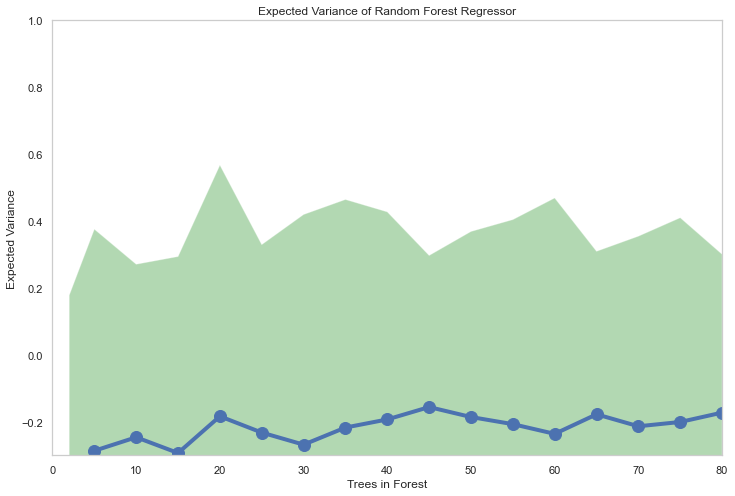

In [166]:
# and plot...
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfrs,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.3,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()


In [167]:
import sklearn.feature_selection as fs # feature selection library in scikit-learn
# first, let's include every feature that has data for all 1460 houses in the data set...
included_features = [col for col in X.columns]
mir_result = fs.mutual_info_regression(X, yt) # mutual information regression feature ordering
feature_scores = []
for i in np.arange(len(included_features)):
    feature_scores.append([included_features[i],mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
print(np.array(sorted_scores))

[['IntendedMajor' '0.0330255757511182']
 ['Hometown' '0.02531112947914993']
 ['Gender' '0.0062743076802453945']
 ['Race' '0.0']
 ['weighted_hs_gpa' '0.0']]


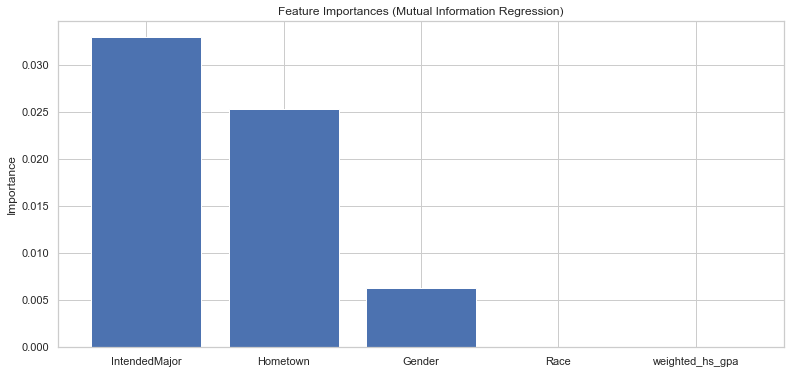

In [168]:
# and plot...
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
ind = np.array(sorted_scores)[:,0]
plt.bar(ind,[float(i) for i in np.array(sorted_scores)[:,1]])
ax.axes.set_xticks(ind)
plt.title('Feature Importances (Mutual Information Regression)')
plt.ylabel('Importance')
# plt.xlabel('Trees in Forest')
# plt.grid()
plt.show()

In [169]:
TTCTscore_pro2_clean

,IntendedMajor,Hometown,Race,Gender,AugAverageSA,DecAverageSA,unweighted_hs_gpa,weighted_hs_gpa,avg_dif
0,2,2,4,1,98.0,108.0,3.637,4.086,10.0
1,0,2,4,2,77.0,93.0,3.882,4.500,16.0
2,0,2,4,2,150.0,108.0,3.836,4.344,-42.0
3,0,3,0,2,91.0,99.0,4.000,4.540,8.0
4,1,2,1,1,88.0,91.0,3.774,4.359,3.0
...,...,...,...,...,...,...,...,...,...
237,0,1,0,2,95.0,89.0,4.000,4.310,-6.0
238,0,2,0,1,76.0,90.0,3.806,4.435,14.0
239,0,0,0,2,79.0,93.0,3.935,4.516,14.0
240,0,3,1,2,74.0,92.0,3.968,4.412,18.0
